In [1]:
import pandas as pd

In [2]:
# get the tables from the US Treasury interest rate table
dfs = pd.read_html('https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield')

In [3]:
# how many tables are there?
print(len(dfs))

8


In [4]:
# by review, table 1 has the yields
df = dfs[1]
df.head(10)

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
0,05/03/21,0.02,0.02,0.04,0.04,0.06,0.16,0.33,0.84,1.29,1.63,2.18,2.30
1,05/04/21,0.01,0.01,0.02,0.04,0.06,0.16,0.33,0.82,1.28,1.61,2.16,2.27
2,05/05/21,0.01,0.01,0.02,0.04,0.06,0.16,0.32,0.80,1.25,1.59,2.14,2.25
3,05/06/21,0.01,0.02,0.02,0.04,0.05,0.16,0.32,0.81,1.25,1.58,2.14,2.24


In [5]:
# use the Date column as the DataFrame row index
df.set_index("Date", drop=True, inplace=True)
df

,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
Date,,,,,,,,,,,,
05/03/21,0.02,0.02,0.04,0.04,0.06,0.16,0.33,0.84,1.29,1.63,2.18,2.30
05/04/21,0.01,0.01,0.02,0.04,0.06,0.16,0.33,0.82,1.28,1.61,2.16,2.27
05/05/21,0.01,0.01,0.02,0.04,0.06,0.16,0.32,0.80,1.25,1.59,2.14,2.25
05/06/21,0.01,0.02,0.02,0.04,0.05,0.16,0.32,0.81,1.25,1.58,2.14,2.24


In [6]:
# What are the latest yields, across maturities
row = df.iloc[-1]
row

1 mo     0.01
2 mo     0.02
3 mo     0.02
6 mo     0.04
1 yr     0.05
2 yr     0.16
3 yr     0.32
5 yr     0.81
7 yr     1.25
10 yr    1.58
20 yr    2.14
30 yr    2.24
Name: 05/06/21, dtype: float64

In [7]:
# get yields into a list
yields = row.tolist()
yields

[0.01, 0.02, 0.02, 0.04, 0.05, 0.16, 0.32, 0.81, 1.25, 1.58, 2.14, 2.24]

In [8]:
# hard-code numeric time values in years, for yield curve
years = [1/12, 2/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30]

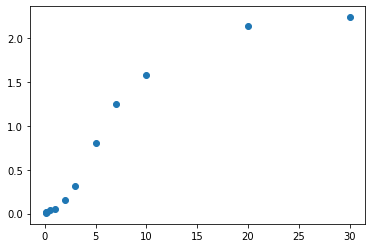

In [9]:
# plot the yield curve
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(years, yields)
plt.show()

In [10]:
df

,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
Date,,,,,,,,,,,,
05/03/21,0.02,0.02,0.04,0.04,0.06,0.16,0.33,0.84,1.29,1.63,2.18,2.30
05/04/21,0.01,0.01,0.02,0.04,0.06,0.16,0.33,0.82,1.28,1.61,2.16,2.27
05/05/21,0.01,0.01,0.02,0.04,0.06,0.16,0.32,0.80,1.25,1.59,2.14,2.25
05/06/21,0.01,0.02,0.02,0.04,0.05,0.16,0.32,0.81,1.25,1.58,2.14,2.24


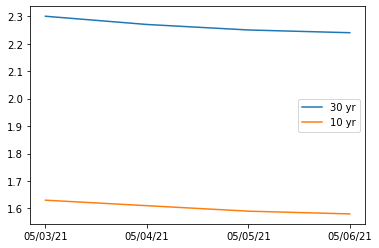

In [16]:
# plot the 2yr and 10yr
fig, ax = plt.subplots()
plt.plot("30 yr", data=df)
plt.plot("10 yr", data=df)
plt.legend()
#ax.tick_params(labelbottom=True) # supress x-axis labels
plt.show()

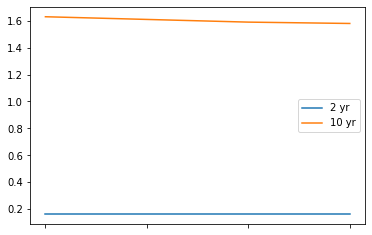

In [12]:
fig, ax = plt.subplots()
plt.plot("2 yr", data=df)
plt.plot("10 yr", data=df)
plt.legend()
ax.tick_params(labelbottom=False) # supress x-axis labels
plt.show()